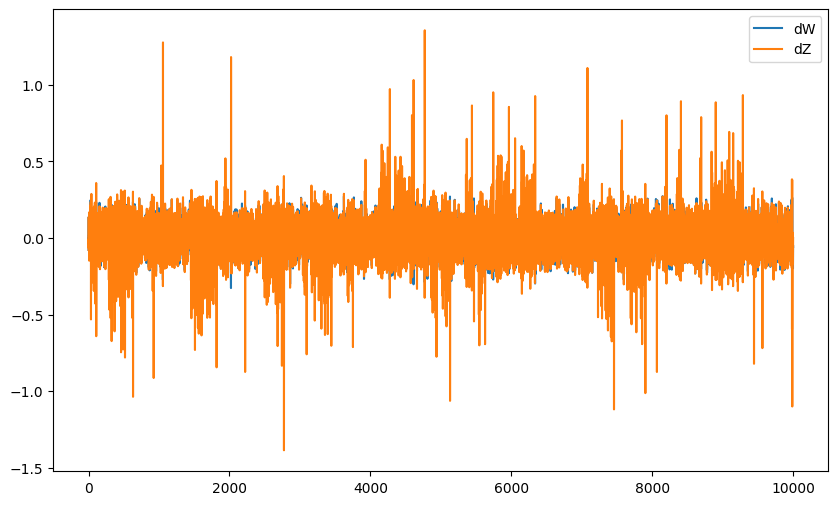

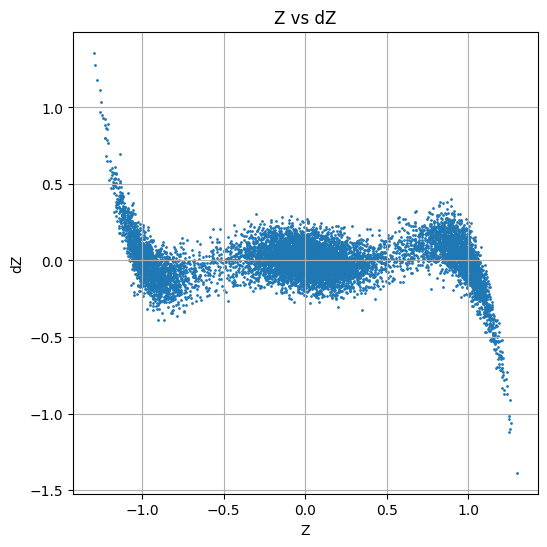

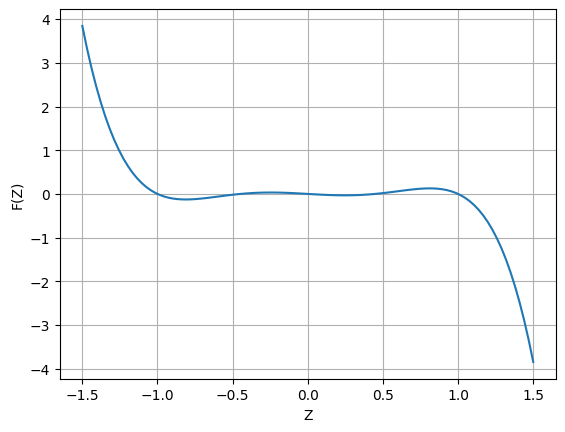

In [8]:
import torch
import matplotlib.pyplot as plt

# Parameters
tmax = 10000
dt = 1.0
D0 = 0.004
a = 1.0
sig = (2 * D0 * dt) ** 0.5

# Generate dW
dW = torch.normal(mean=0.0, std=sig, size=(tmax,))

# Initialize Z and dZ
Z = torch.zeros(tmax)
dZ = torch.zeros(tmax)

# Drift function F
def F(x):
    return dt * a * (-0.2 * x + 1.2 * x**3 - x**5)

# Simulate the SDE
for t in range(tmax - 1):
    dZ[t] = F(Z[t]) + dW[t]
    Z[t + 1] = Z[t] + dZ[t]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dW.numpy(), label='dW')
plt.plot(dZ.numpy(), label='dZ')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(Z.numpy(), dZ.numpy(), s=1)
plt.xlabel('Z')
plt.ylabel('dZ')
plt.title('Z vs dZ')
plt.grid(True)
plt.show()

# Plot F
Z_vals = torch.linspace(-1.5, 1.5, 100)
F_vals = F(Z_vals)
plt.plot(Z_vals.numpy(), F_vals.numpy(), label='F(Z)')
plt.xlabel('Z')
plt.ylabel('F(Z)')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Z vs Estimated dZ')

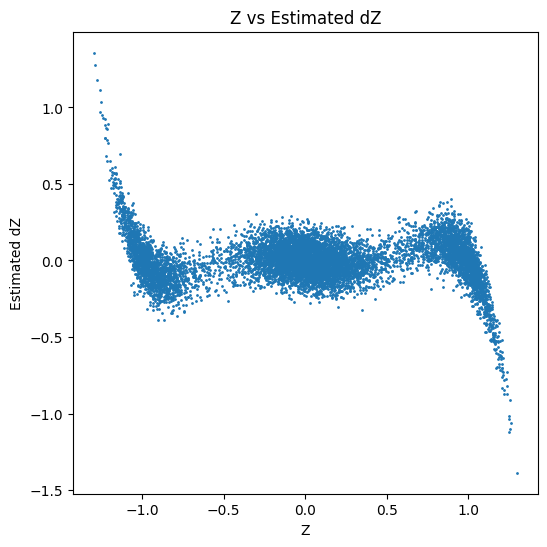

In [10]:
#estimate the gradient of Z using finite differences
Z_np = Z.numpy()
# Compute the gradient of Z using finite differences np.diff and store as np array
dZ_est = np.diff(Z_np) / dt
# Plot the estimated gradient of Z
plt.figure(figsize=(6, 6))
plt.scatter(Z_np[:-1], dZ_est, s=1)
plt.xlabel('Z')
plt.ylabel('Estimated dZ')
plt.title('Z vs Estimated dZ')



In [13]:
Z_np.shape

(10000,)

In [14]:
Z_np_reshaped.shape

(9999, 1)

/opt/homebrew/Caskroom/miniconda/base/envs/sde_inf/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.773e+01, tolerance: 2.022e-02
  model = cd_fast.enet_coordinate_descent(


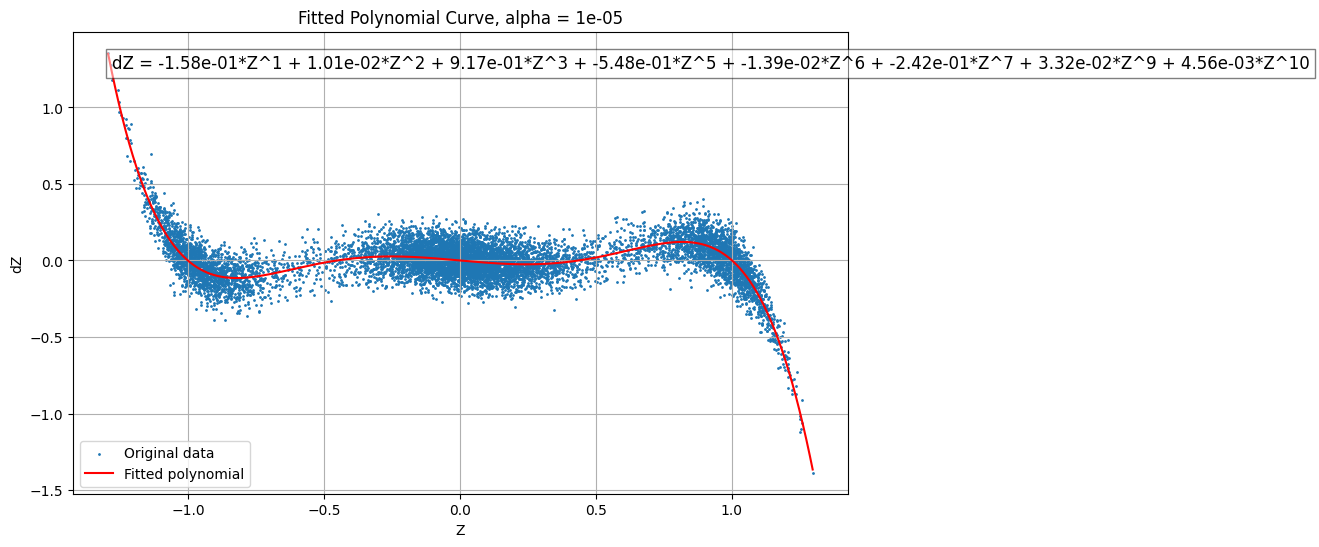

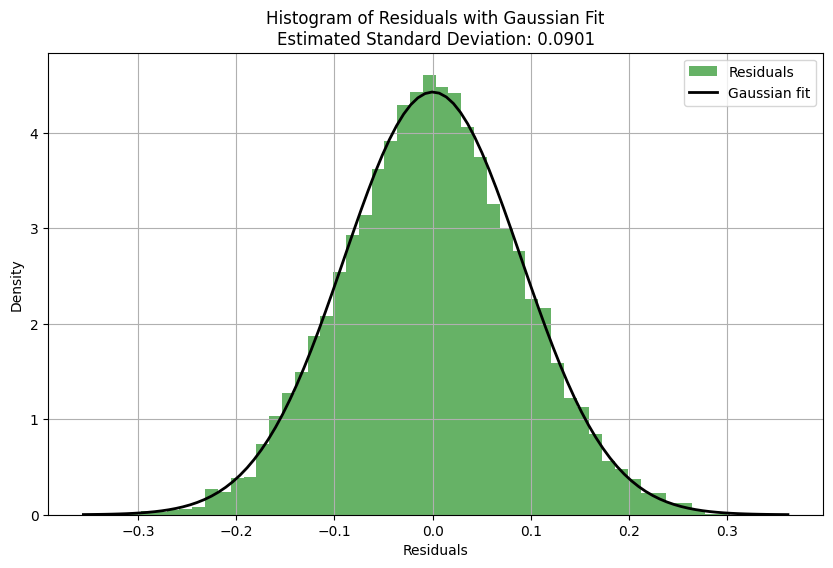

/opt/homebrew/Caskroom/miniconda/base/envs/sde_inf/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.068e-01, tolerance: 2.022e-02
  model = cd_fast.enet_coordinate_descent(


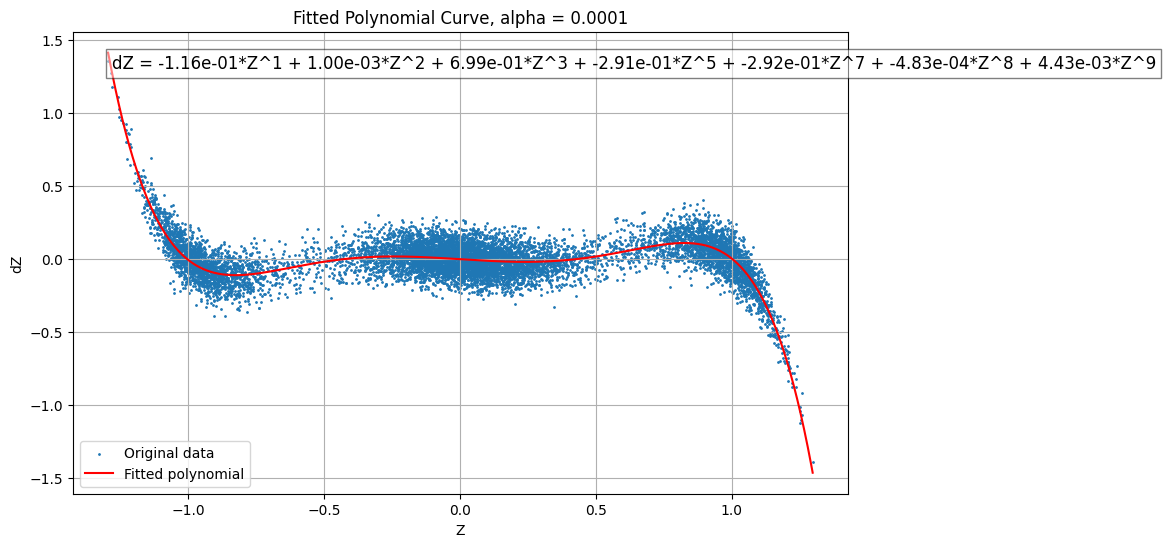

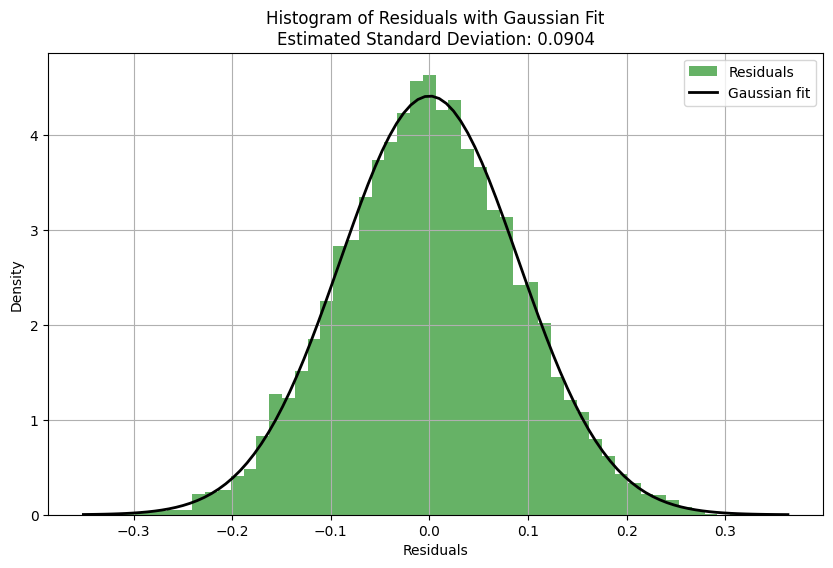

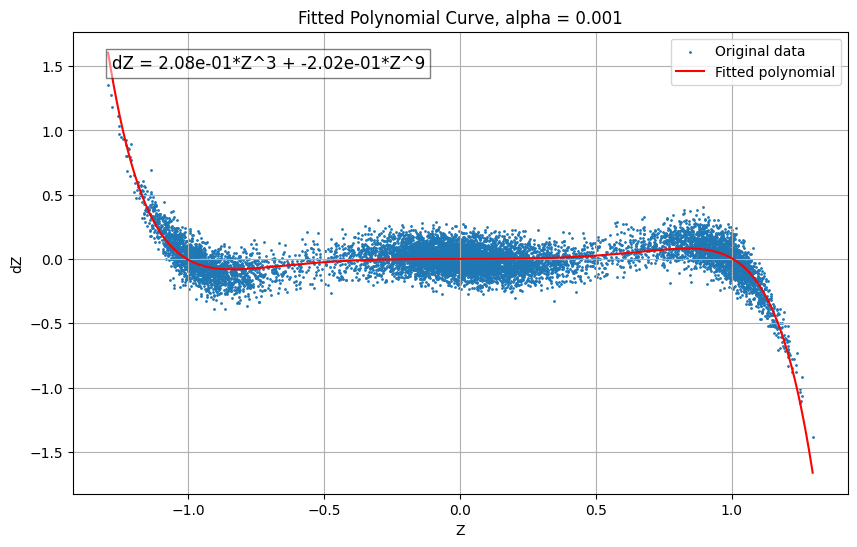

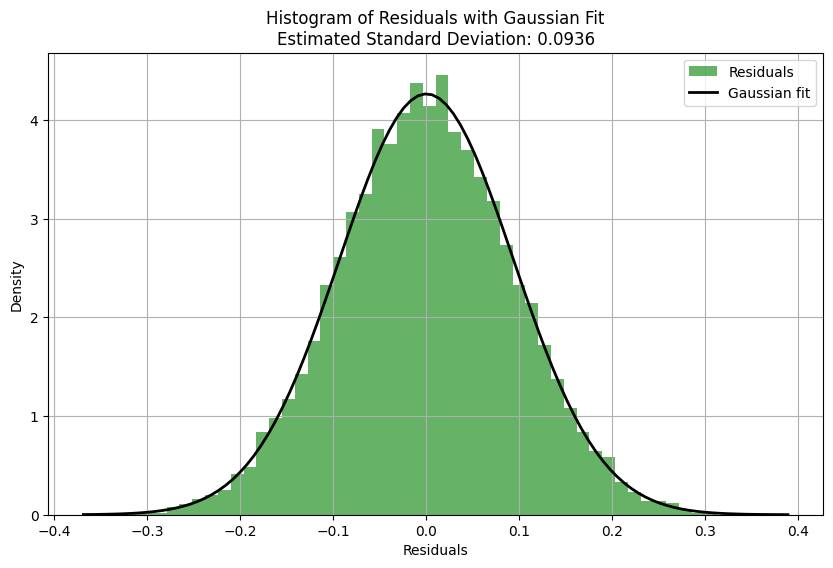

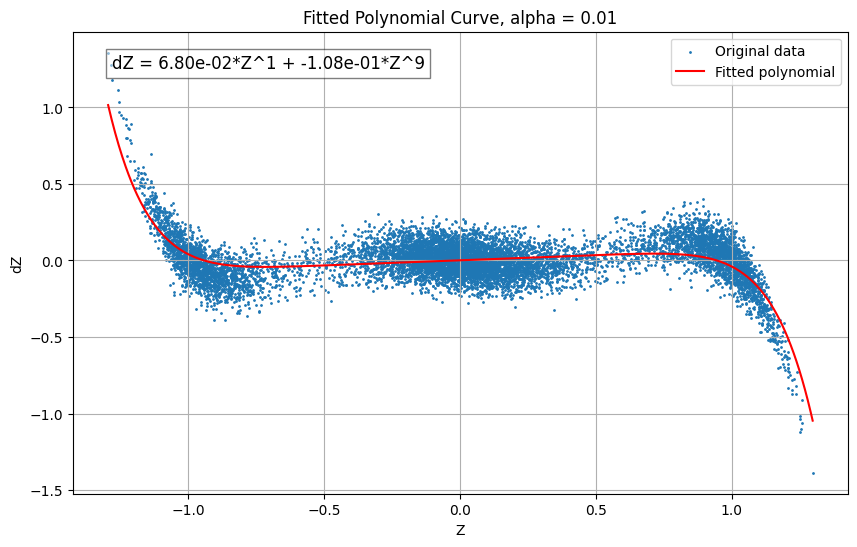

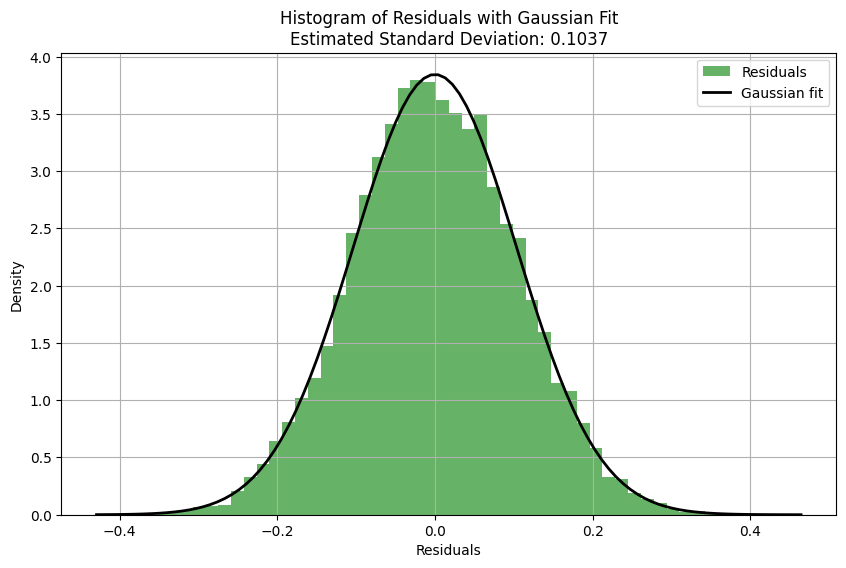

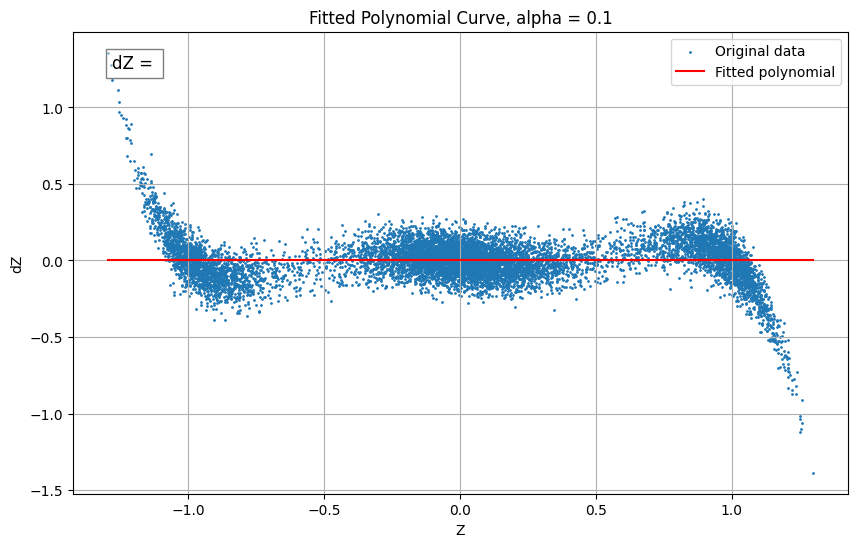

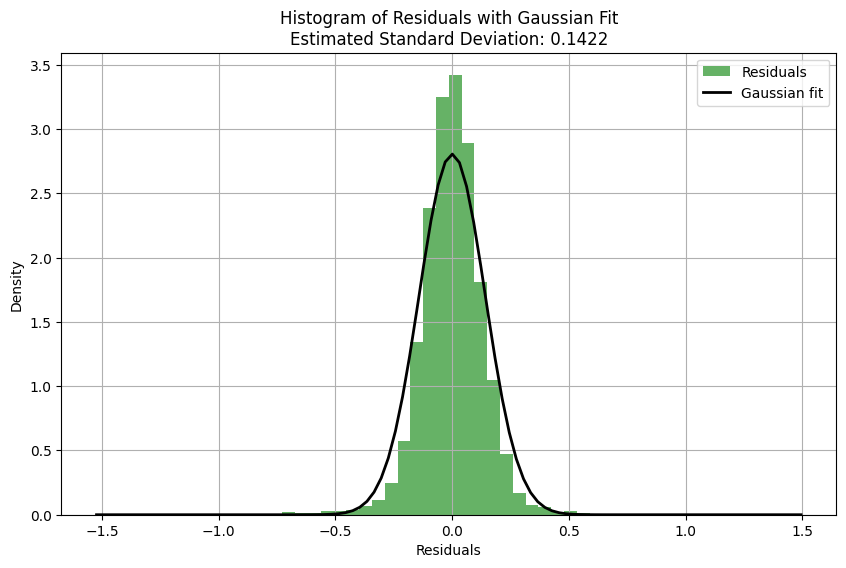

In [30]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.stats import norm

# Define the degree of the polynomial
degree = 10
for alpha in [0.00001, 0.0001,0.001, 0.01, 0.1]:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    Z_np_reshaped = Z_np[:-1].reshape(-1, 1)  # Reshape Z_np to be a 2D array

    # Create a Lasso regression model with L1 regularization
    lasso = Lasso(alpha=alpha)

    # Create a pipeline that first transforms the data to polynomial features, then fits the Lasso model
    model = make_pipeline(poly, lasso)

    # Fit the model
    model.fit(Z_np_reshaped, dZ_est)

    # Get the coefficients
    coefficients = model.named_steps['lasso'].coef_

    # Print the coefficients
    #print("Coefficients of the polynomial fit using L1 regression:", coefficients)

    # Generate a range of Z values for plotting the polynomial
    Z_range = np.linspace(Z_np.min(), Z_np.max(), 1000).reshape(-1, 1)

    # Use the model to predict dZ values for the range of Z values
    dZ_pred = model.predict(Z_range)

    # Plot the original data points and the fitted polynomial curve
    plt.figure(figsize=(10, 6))
    plt.scatter(Z_np[:-1], dZ_est, s=1, label='Original data')
    plt.plot(Z_range, dZ_pred, color='red', label='Fitted polynomial')
    plt.xlabel('Z')
    plt.ylabel('dZ')
    plt.title(f'Fitted Polynomial Curve, alpha = {alpha}')
    plt.legend()
    plt.grid(True)
    # Generate the equation string
    equation_terms = [f"{coeff:.2e}*Z^{i}" for i, coeff in enumerate(coefficients) if coeff != 0]
    equation = " + ".join(equation_terms)
    equation_text = f"dZ = {equation}"

    # Add the equation text to the plot
    plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

    # Calculate residuals
    residuals = dZ_est - model.predict(Z_np_reshaped)

    # Plot histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=50, density=True, alpha=0.6, color='g', label='Residuals')

    # Fit a Gaussian to the residuals
    mu, std_dev = norm.fit(residuals)

    # Plot the Gaussian fit
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std_dev)
    plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

    # Display the estimated standard deviation
    plt.title(f'Histogram of Residuals with Gaussian Fit\nEstimated Standard Deviation: {std_dev:.4f}')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

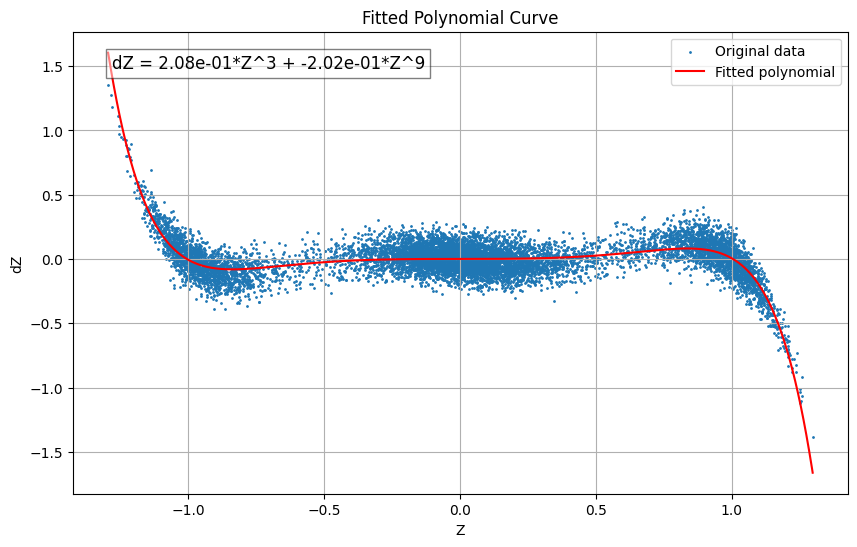

## 2D examples

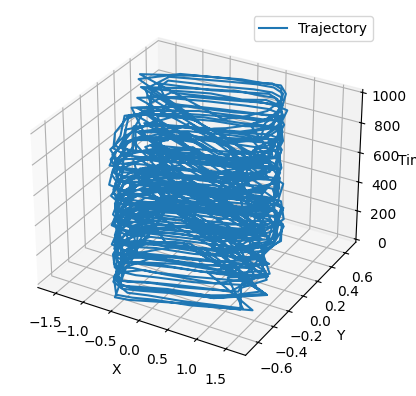

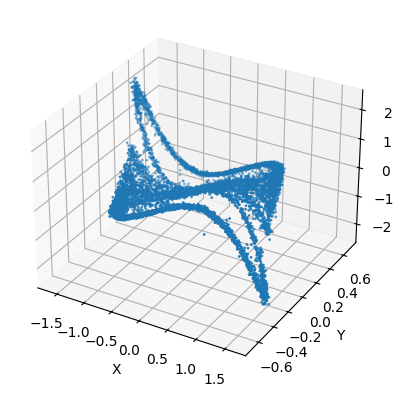

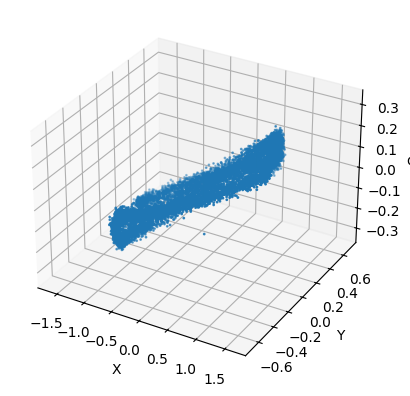

In [7]:
import torch
import matplotlib.pyplot as plt

# Parameters
tmax = 10000
dt = 1.0
a = 1.0
DX = 0.0004
DY = 0.0001
sigX = (2 * DX * dt) ** 0.5
sigY = (2 * DY * dt) ** 0.5

# Generate dWX and dWY
dWX = torch.normal(mean=0.0, std=sigX, size=(tmax,))
dWY = torch.normal(mean=0.0, std=sigY, size=(tmax,))

# Initialize X, Y, dX, and dY
X = torch.zeros(tmax)
Y = torch.zeros(tmax)
dX = torch.zeros(tmax)
dY = torch.zeros(tmax)

# Drift functions FX and FY
def FX(x, y):
    return dt * a * ((x - y) - x**3)

def FY(x, y):
    return dt * a * (0.2 * (y + x) - y**3)

# Simulate the SDE
for t in range(tmax - 1):
    dX[t] = FX(X[t], Y[t]) + dWX[t]
    dY[t] = FY(X[t], Y[t]) + dWY[t]
    X[t + 1] = X[t] + dX[t]
    Y[t + 1] = Y[t] + dY[t]

# 3D Line Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:1000].numpy(), Y[:1000].numpy(), range(1000), label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time')
plt.legend()
plt.show()

# 3D Scatter Plot for dX
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.numpy(), Y.numpy(), dX.numpy(), s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('dX')
plt.show()

# 3D Scatter Plot for dY
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.numpy(), Y.numpy(), dY.numpy(), s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('dY')
plt.show()


In [2]:
import numpy as np
import pysindy as ps

t = np.linspace(0, 1, 100)
x = 3 * np.exp(-2 * t)
y = 0.5 * np.exp(t)
X = np.stack((x, y), axis=-1)  # First column is x, second is y
model = ps.SINDy(feature_names=["x", "y"])
model.fit(X, t=t)
model.print()

(x)' = -2.000 x
(y)' = 1.000 y


In [11]:
import pysindy as ps 
import numpy as np

# # Monkeypatch
# from scipy.special import factorial
# np.math = type('math', (), {})()
# np.math.factorial = factorial


X_combined = np.stack((X, Y), axis=1)
model = ps.SINDy(feature_names = ['X', 'Y'])
t = np.arange(0, tmax, dt)
model.fit(X_combined, t=t)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X', 'Y'],
      optimizer=STLSQ())

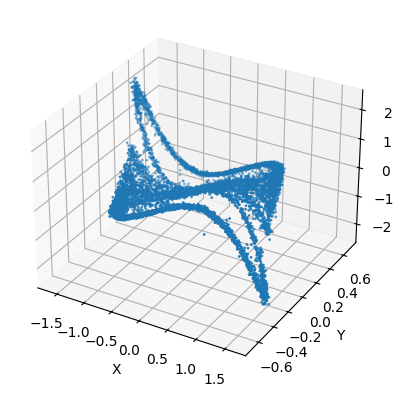

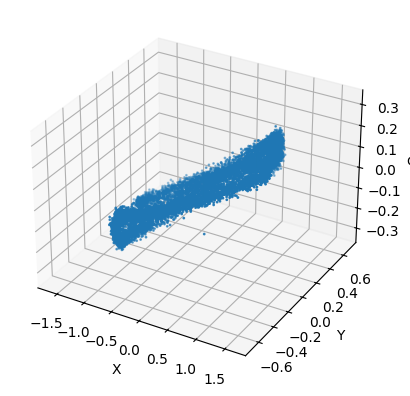

In [12]:

# 3D Scatter Plot for dX
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.numpy(), Y.numpy(), dX.numpy(), s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('dX')
plt.show()

# 3D Scatter Plot for dY
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.numpy(), Y.numpy(), dY.numpy(), s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('dY')
plt.show()

In [13]:
model.print()

(X)' = -0.514 Y
(Y)' = 0.165 X


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Generate polynomial features
def generate_polynomial_features(X, Y, max_degree):
    poly = PolynomialFeatures(degree=max_degree, include_bias=False)
    XY = np.stack([X, Y], axis=1)
    return poly.fit_transform(XY), poly.get_feature_names_out(['X', 'Y']), poly

# Perform L1 regression (Lasso)
def lasso_regression(X_poly, dX, alpha=0.01):
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_poly, dX)
    return lasso

# Print non-zero terms from Lasso regression
def print_equation(lasso, feature_names):
    non_zero_indices = np.where(lasso.coef_ != 0)[0]
    equation = " + ".join(
        f"{lasso.coef_[i]:.4f}*{feature_names[i]}"
        for i in non_zero_indices
    )
    print(f"Derived equation: dX = {equation}")

def return_equation(lasso, feature_names):
    non_zero_indices = np.where(lasso.coef_ != 0)[0]
    equation = " + ".join(
        f"{lasso.coef_[i]:.4f}*{feature_names[i]}"
        for i in non_zero_indices
    )
    return equation

def plot_predicted_surface(lasso, X, Y, feature_names, poly):
    # Generate a grid for surface plotting
    grid_x, grid_y = np.meshgrid(np.linspace(X.min(), X.max(), 100),
                                 np.linspace(Y.min(), Y.max(), 100))
    
    # Generate polynomial features for the grid using the same PolynomialFeatures instance
    grid_poly = poly.transform(np.column_stack([grid_x.ravel(), grid_y.ravel()]))

    grid_dX = lasso.predict(grid_poly).reshape(grid_x.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(grid_x, grid_y, grid_dX, alpha=0.7, cmap='viridis')
    ax.scatter(X, Y, dX, color='red', s=1, label='Data')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('dX')
    plt.title('Predicted Surface')
    plt.legend()
    plt.show()


Derived equation: dX = 0.4275*X + -0.8146*Y + -0.0535*X^3 + -0.3019*X^5


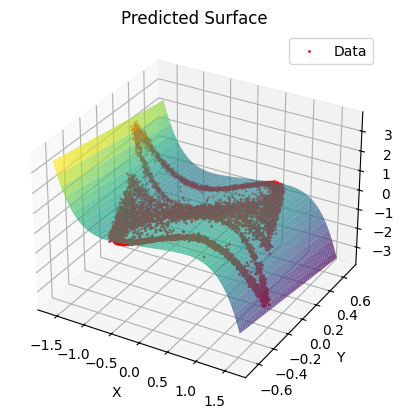

In [28]:
# Convert to numpy arrays
X_np = X.numpy()
Y_np = Y.numpy()
dX_np = dX.numpy()

# Generate polynomial features
max_degree = 5
X_poly, feature_names, poly = generate_polynomial_features(X_np, Y_np, max_degree)

# Perform L1 regression
lasso = lasso_regression(X_poly, dX_np)

# Print the derived equation
print_equation(lasso, feature_names)

# Plot the predicted surface
plot_predicted_surface(lasso, X_np, Y_np, feature_names, poly)

Derived equation: dX = 0.4275*X + -0.8146*Y + -0.0535*X^3 + -0.3019*X^5


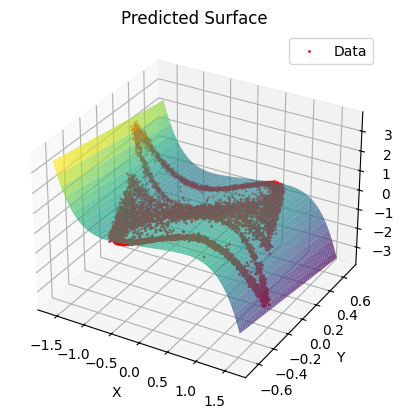

MovieWriter imagemagick unavailable; using Pillow instead.


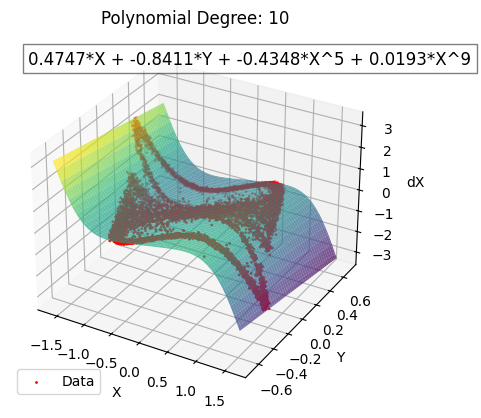

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def plot_predicted_surface(lasso, X, Y, dX, feature_names, poly):
    grid_x, grid_y = np.meshgrid(np.linspace(X.min(), X.max(), 100),
                                 np.linspace(Y.min(), Y.max(), 100))
    grid_poly = poly.transform(np.column_stack([grid_x.ravel(), grid_y.ravel()]))
    grid_dX = lasso.predict(grid_poly).reshape(grid_x.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(grid_x, grid_y, grid_dX, alpha=0.7, cmap='viridis')
    ax.scatter(X, Y, dX, color='red', s=1, label='Data')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('dX')
    plt.title('Predicted Surface')
    plt.legend()
    plt.show()

def animate_fitted_surfaces(X_np, Y_np, dX_np, max_degree=10, target_name = 'dX'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    grid_x, grid_y = np.meshgrid(np.linspace(X_np.min(), X_np.max(), 100),
                                 np.linspace(Y_np.min(), Y_np.max(), 100))
    
    def update(degree):
        ax.clear()
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly.fit_transform(np.column_stack([X_np, Y_np]))
        lasso = lasso_regression(X_poly, dX_np)
        
        grid_poly = poly.transform(np.column_stack([grid_x.ravel(), grid_y.ravel()]))
        grid_dX = lasso.predict(grid_poly).reshape(grid_x.shape)
        equation = return_equation(lasso, poly.get_feature_names_out(['X', 'Y']))
        ax.plot_surface(grid_x, grid_y, grid_dX, alpha=0.7, cmap='viridis')
        ax.scatter(X_np, Y_np, dX_np, color='red', s=1, label='Data')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel(target_name)
        ax.set_title(f'Polynomial Degree: {degree}')
        ax.text2D(0.05, 0.95, f'{equation}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
        plt.legend()

    anim = FuncAnimation(fig, update, frames=range(1, max_degree + 1), interval=1000)
    anim.save('fitted_surfaces.gif', writer='imagemagick')
    plt.show()

# Driver Code
# Convert to numpy arrays
X_np = X.numpy()
Y_np = Y.numpy()
dX_np = dX.numpy()
dY_np = dY.numpy()

# Generate polynomial features for initial plot
max_degree = 5
X_poly, feature_names, poly = generate_polynomial_features(X_np, Y_np, max_degree)

# Perform L1 regression
lasso = lasso_regression(X_poly, dX_np)

# Print the derived equation
print_equation(lasso, feature_names)

# Plot the predicted surface with interaction
plot_predicted_surface(lasso, X_np, Y_np, dX_np, feature_names, poly)

# Create the animation for increasing polynomial degrees
animate_fitted_surfaces(X_np, Y_np, dX_np, max_degree=10)


MovieWriter imagemagick unavailable; using Pillow instead.


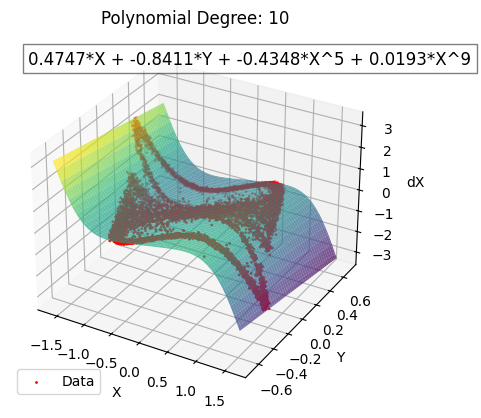

In [46]:
# Driver Code
# Convert to numpy arrays
X_np = X.numpy()
Y_np = Y.numpy()
dX_np = dX.numpy()
dY_np = dY.numpy()
# Create the animation for increasing polynomial degrees
animate_fitted_surfaces(X_np, Y_np, dX_np, max_degree=10, target_name='dX')

In [44]:
from scipy.stats import norm

def fit_surfaces_get_noise_hist(X_np, Y_np, dX_np, max_degree=10, target_name = 'dX'):
    for degree in range(1, max_degree + 1):
        plt.figure(figsize=(10, 6))

        ax.clear()
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly.fit_transform(np.column_stack([X_np, Y_np]))
        lasso = lasso_regression(X_poly, dX_np)
        residuals = dX_np - lasso.predict(X_poly)
        mu, std_dev = norm.fit(residuals)
        plt.hist(residuals, bins=50, density=True, alpha=0.6, color='g', label='Residuals')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std_dev)
        plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')
        plt.title(f'Histogram of Residuals for {target_name}, degree = {degree}\nEstimated Standard Deviation: {std_dev:.4f}')
        plt.xlabel('Residuals')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.show()



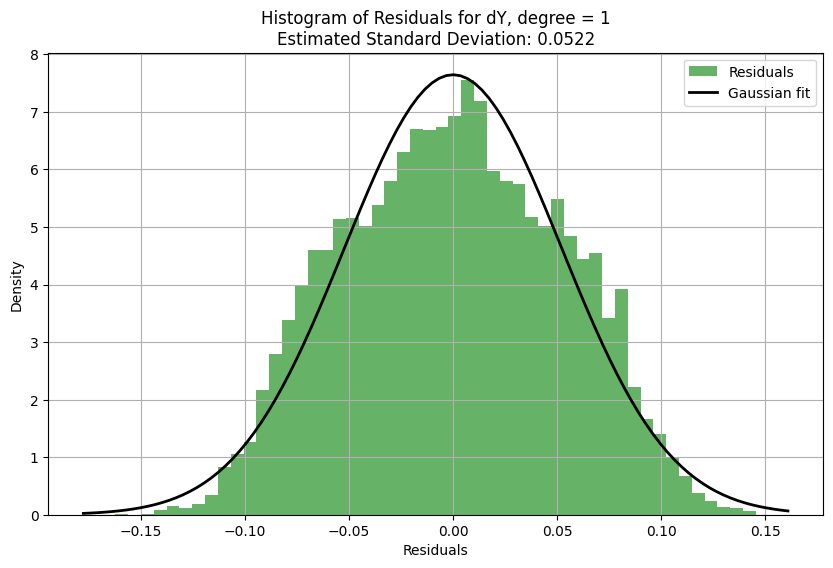

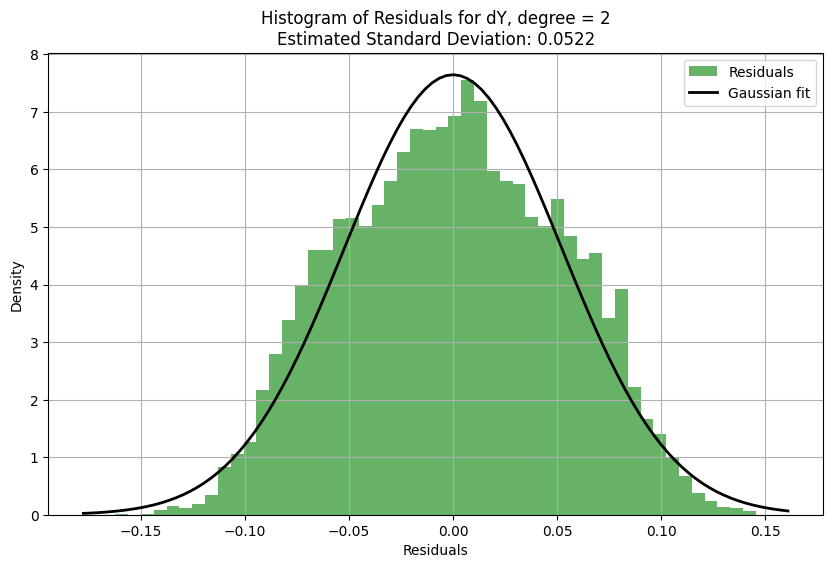

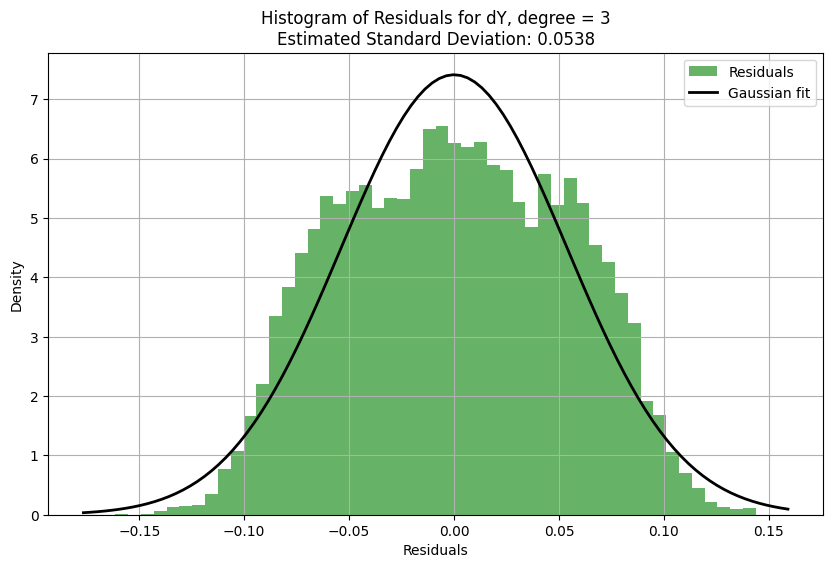

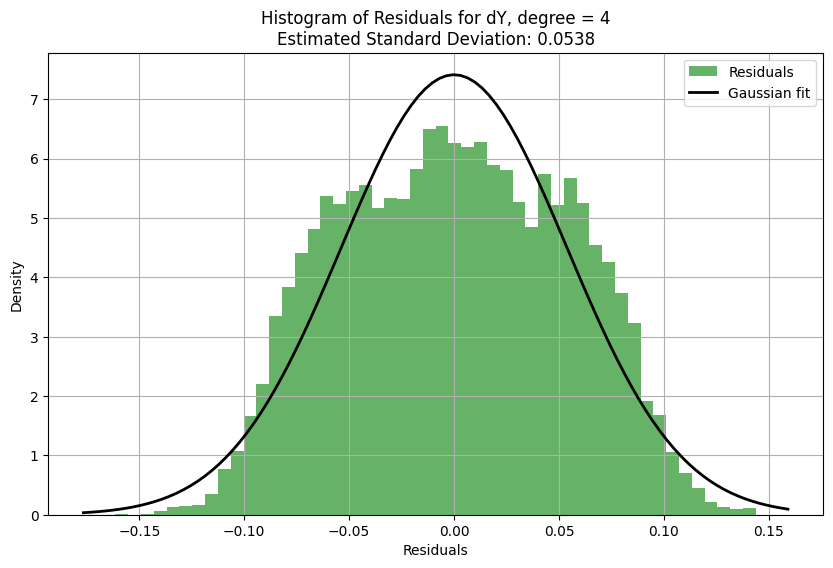

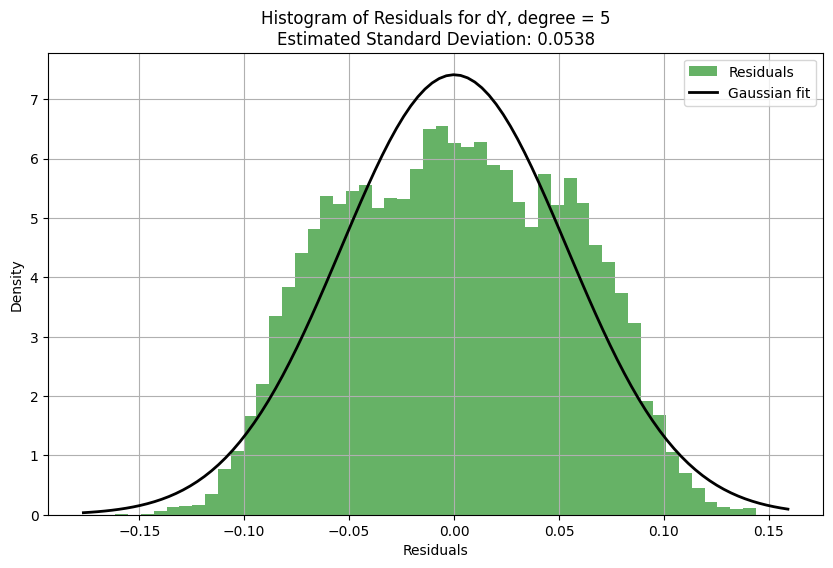

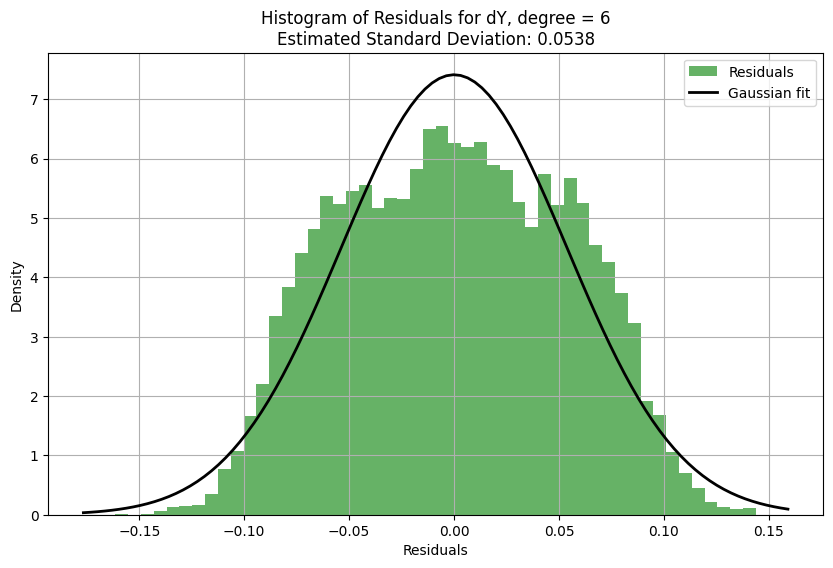

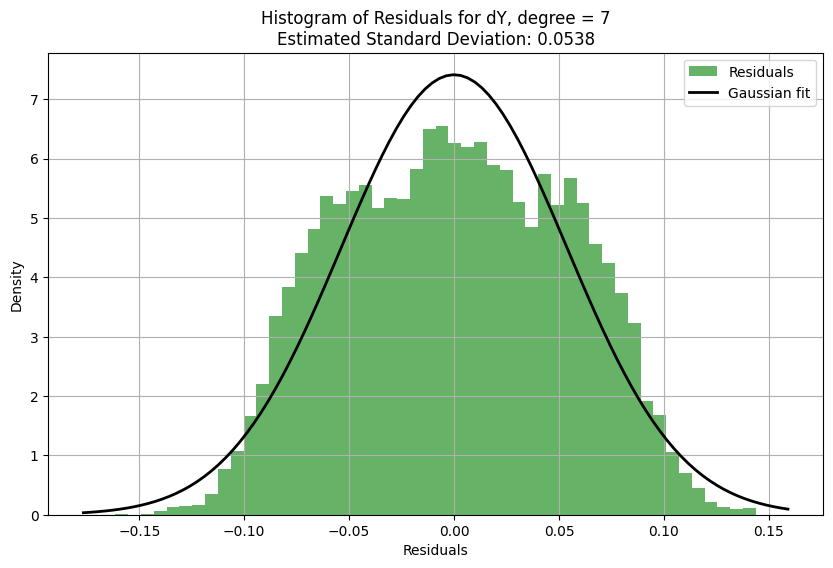

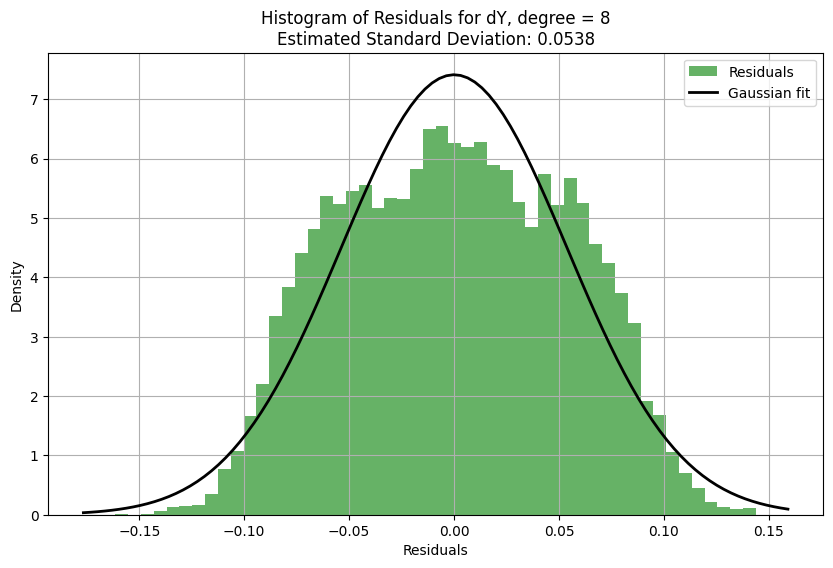

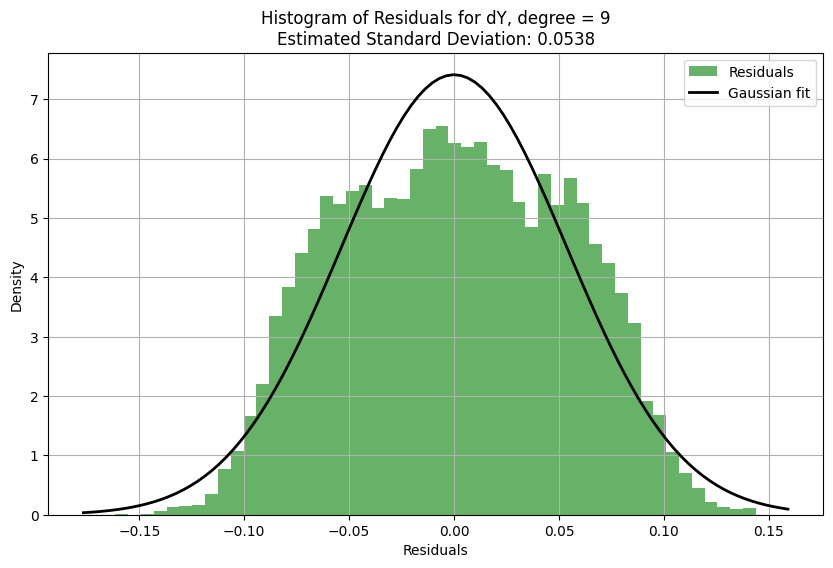

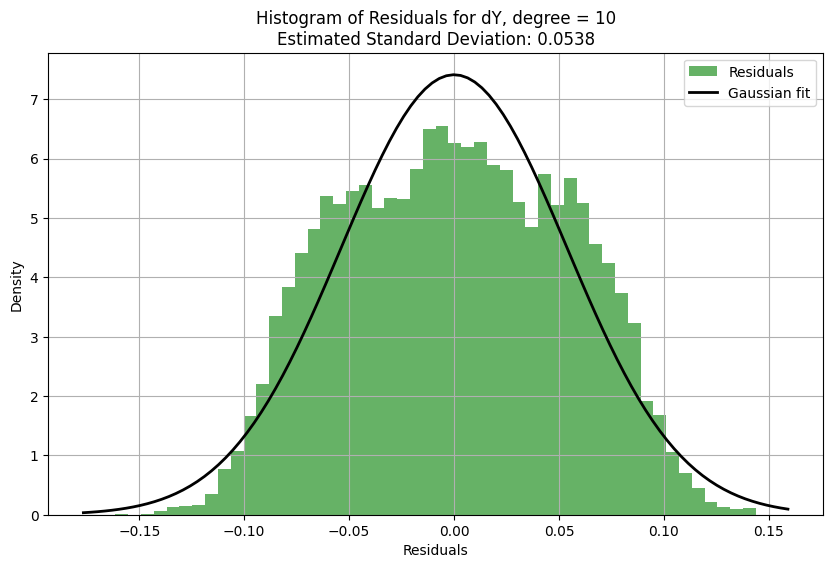

In [47]:
fit_surfaces_get_noise_hist(X_np, Y_np, dY_np, max_degree=10, target_name = 'dY')